In [32]:
from flashbax.vault import Vault
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
v = Vault(
    rel_dir="experiment_results/ff_ippo/25-02-22/22-02-03/vaults",
    vault_name="ipd_squared",
    vault_uid="20250222220203",
)
buffer_state = v.read()

Loading vault found at /mnt/c/Users/ryanp/OneDrive/Documents/Jax-Party/experiment_results/ff_ippo/25-02-22/22-02-03/vaults/ipd_squared/20250222220203


In [13]:
# from jax_party import upload_folder

# upload_folder(
#     name="ippo_experiment",
#     description="IPPO, rank_based_reward = 1.0",
#     folder_path="experiment_results/ff_ippo/25-02-07/13-18-26"
# )

In [33]:
buffer_state.experience["action"].shape

(64, 15616, 4)

In [34]:
actions = buffer_state.experience["action"]
rewards = buffer_state.experience["reward"]
action_mask = buffer_state.experience["legal_action_mask"]

In [35]:
action_sum_per_agent = actions.reshape((-1, 4)).sum(axis=0)
action_sum_per_agent

Array([977636, 977799, 978644, 976743], dtype=int32)

In [36]:
jnp.bincount(actions.flatten())

Array([  86874, 3910822], dtype=int32)

[-949716.75 -947855.25 -948662.5  -949733.5 ]


<BarContainer object of 4 artists>

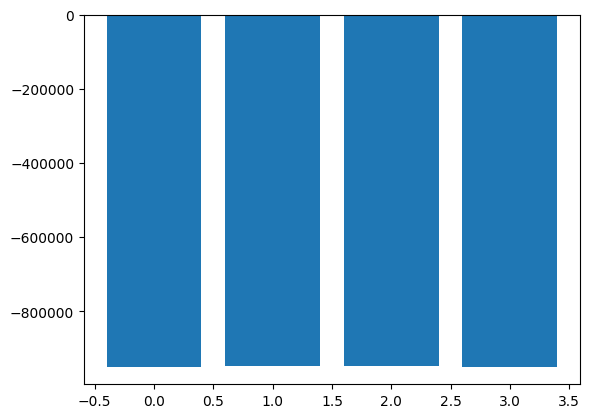

In [37]:
rewards_sum_per_agent = rewards.reshape((-1, 4)).sum(axis=0)
print(rewards_sum_per_agent)
plt.bar(jnp.arange(4), rewards_sum_per_agent)

In [38]:
rewards.reshape(-1, 4).cumsum(0)

Array([[-1.8601342e+00, -2.1398656e+00,  1.2863734e+00,  2.7136266e+00],
       [ 1.1503018e+00, -1.1503016e+00,  2.8052576e+00,  5.1947427e+00],
       [-7.4300528e-01, -3.2569947e+00,  5.4205046e+00,  6.5794954e+00],
       ...,
       [-9.4971450e+05, -9.4785344e+05, -9.4865962e+05, -9.4973238e+05],
       [-9.4971556e+05, -9.4785438e+05, -9.4866100e+05, -9.4973300e+05],
       [-9.4971675e+05, -9.4785519e+05, -9.4866256e+05, -9.4973344e+05]],      dtype=float32)

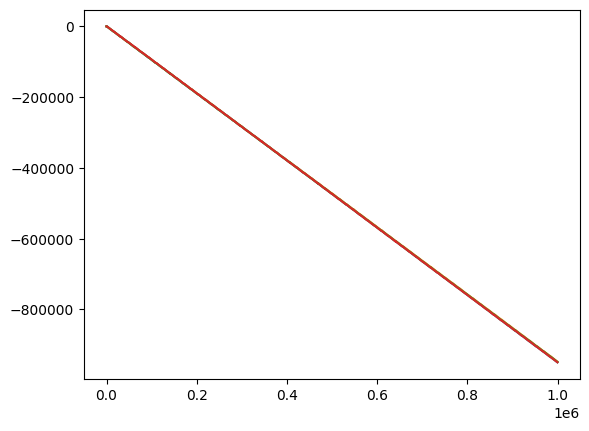

In [39]:
plt.plot(rewards.reshape((-1, 4)).cumsum(0))

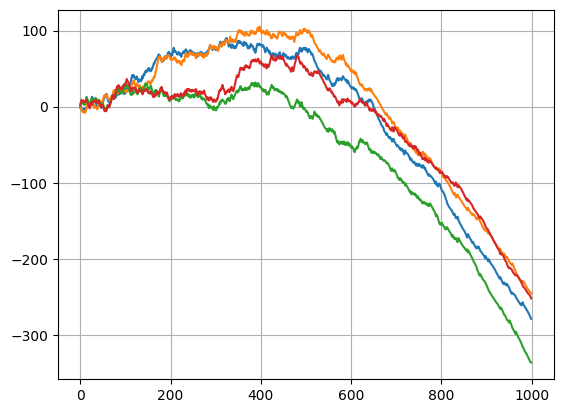

In [43]:
plt.plot(rewards.reshape((-1, 4)).cumsum(0)[:1000])
plt.grid()

In [41]:
jax.tree.map(
    lambda x: x.reshape(-1, x.shape[-1])[:3],
    (jnp.int8(action_mask), actions, rewards),
)

(Array([[1, 1],
        [1, 1],
        [1, 1]], dtype=int8),
 Array([[0, 1, 1, 1],
        [0, 1, 1, 0],
        [0, 0, 1, 0]], dtype=int32),
 Array([[-1.8601342 , -2.1398656 ,  1.2863734 ,  2.7136266 ],
        [ 3.010436  ,  0.98956406,  1.5188842 ,  2.481116  ],
        [-1.8933071 , -2.106693  ,  2.615247  ,  1.384753  ]],      dtype=float32))